## Install Packages

In [1]:
%%capture

!pip install pycocotools

## Imports

In [2]:
# Python Modules
# --------------------------------------------------
import os
import sys
import numpy             as np
import matplotlib.pyplot as plt


# Torch Modules
# --------------------------------------------------
import torch

from torchvision import transforms


# Third Party Modules
# --------------------------------------------------
from pycocotools.coco import COCO


# Custom Modules
# --------------------------------------------------
% load_ext autoreload
% autoreload 2

import config
import utils

from Model import (
    EncoderCNN, 
    DecoderRNN
)


# Settings
# --------------------------------------------------
sys.path.append(config.COCO_API_PATH)

%matplotlib inline

## Initialize Image Transformer

In [3]:
transform_test = transforms.Compose([ 
    transforms.Resize(config.EMBED_SIZE),                        
    transforms.RandomCrop(config.INPUT_SIZE),                      
    transforms.RandomHorizontalFlip(),             
    transforms.ToTensor(),                          
    transforms.Normalize(
        config.IMAGENET_MU,      
        config.IMAGENET_SIGMA
    )
])

## Initialize Data Loader

In [4]:
data_loader = utils.get_loader(
    transform       = transform_test,    
    mode            = "test",
    batch_size      = config.TEST_BATCH_SIZE,
    ann_file        = config.ANN_INFO_TEST_FILE,
    vocab_from_file = config.LOAD_VOCAB_FILE
)

## Visualize Test Image

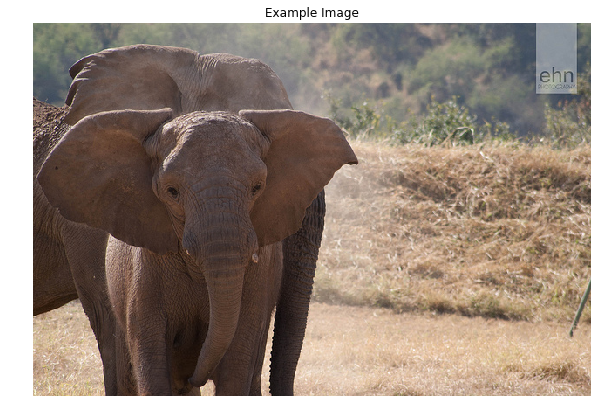

In [5]:
orig_image, image = next(iter(data_loader))

plt.figure(figsize = (10, 10))
plt.imshow(np.squeeze(orig_image))
plt.title("Example Image")
plt.axis("off")

plt.show()

## Load Model

In [6]:
# Define Device
# --------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Get Vocab Size
# --------------------------------------------------
vocab_size = len(data_loader.dataset.vocab)


# Load Encoder
# --------------------------------------------------
encoder = EncoderCNN()
encoder.eval()


# Load Decoder
# --------------------------------------------------
decoder = DecoderRNN(vocab_size)
decoder.eval()


# Load Weights
# --------------------------------------------------
encoder.load_state_dict(torch.load(f"{config.MODEL_DIR}/encoder-{config.TRAIN_EPOCHS}.pkl"))
decoder.load_state_dict(torch.load(f"{config.MODEL_DIR}/decoder-{config.TRAIN_EPOCHS}.pkl"))


# Move Models to GPU if CUDA
# --------------------------------------------------
encoder.to(device)
decoder.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 87173189.18it/s]


DecoderRNN(
  (embed): Embedding(8855, 256)
  (lstm): LSTM(256, 512, num_layers=2, batch_first=True)
  (fc): Linear(in_features=512, out_features=8855, bias=True)
)

## Get Predictions

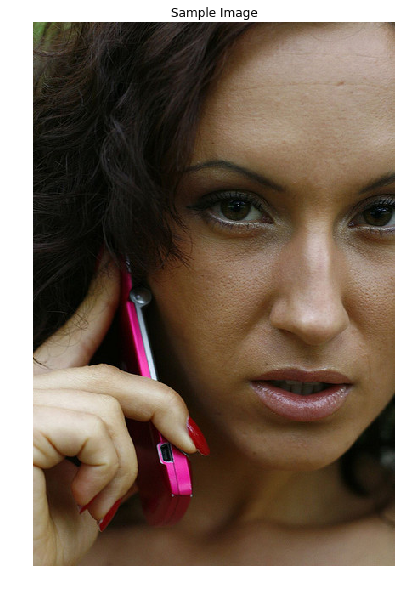

a woman holding a cell phone in her hand.


In [22]:
utils.get_prediction(
    encoder     = encoder, 
    decoder     = decoder,   
    device      = device, 
    data_loader = data_loader
)

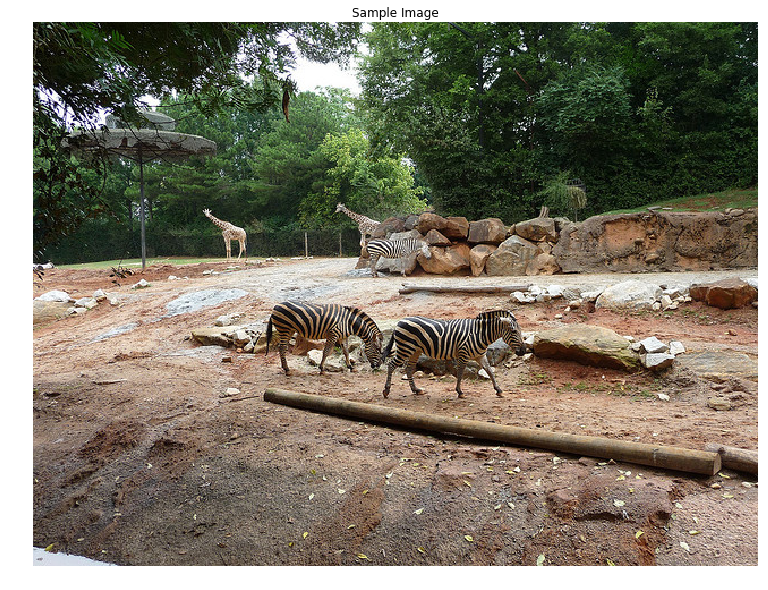

a herd of zebras are walking around a dirt area.


In [34]:
utils.get_prediction(
    encoder     = encoder, 
    decoder     = decoder,   
    device      = device, 
    data_loader = data_loader
)

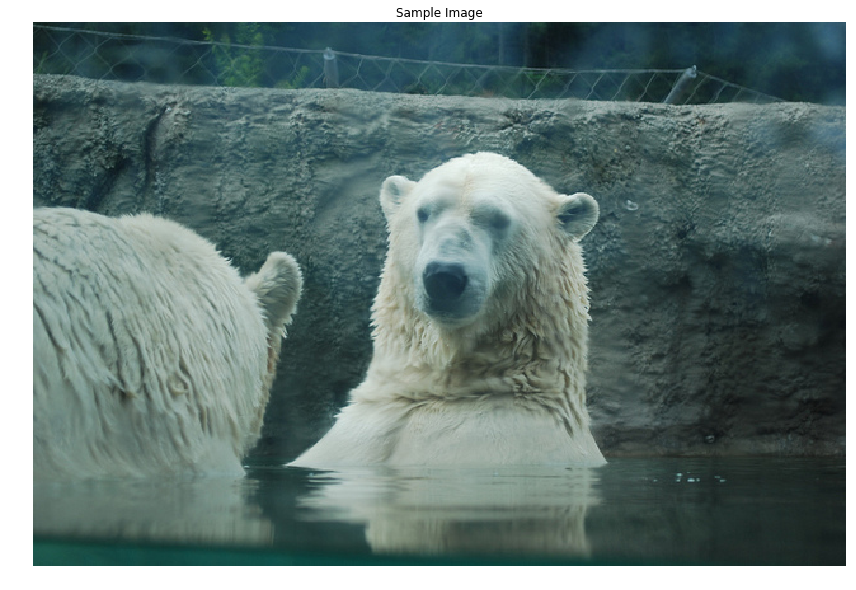

a polar bear is standing in the water.


In [41]:
utils.get_prediction(
    encoder     = encoder, 
    decoder     = decoder,   
    device      = device, 
    data_loader = data_loader
)